* topic -> llm (tell generate outline) -> LLM (give topic+ outline and tell generate blog) -> blog

* START -> Generate outline -> Generate blog -> END

In [5]:
import os
from langgraph.graph import StateGraph, START, END 
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from typing import TypedDict

In [4]:
## build Prompt chain State

class PromptChainState(TypedDict):
  topic: str
  outline: str
  blog: str 


In [10]:
## create fn for outline generater llm node

def outline_generator(state:PromptChainState) -> PromptChainState:

  llm= HuggingFaceEndpoint(
    repo_id="Qwen/Qwen2.5-1.5B-Instruct",
    task="text-generation",
    huggingfacehub_api_token= os.getenv('HUGGINGFACEHUB_API_TOKEN')
  )

  model= ChatHuggingFace(llm= llm)

  prompt= PromptTemplate(
    template="Generate Outline for this topic {topic}",
    input_variables=['topic']
  )

  parser= StrOutputParser()

  chain= prompt|model|parser 
  result= chain.invoke(state)

  state['outline']= result

  return state

## create fn for blog generator llm node

def blog_generator(state: PromptChainState)-> PromptChainState:
  llm= HuggingFaceEndpoint(
    repo_id="Qwen/Qwen2.5-1.5B-Instruct",
    task="text-generation",
    huggingfacehub_api_token= os.getenv('HUGGINGFACEHUB_API_TOKEN')
  )

  model= ChatHuggingFace(llm= llm)

  prompt= PromptTemplate(
    template="Generate a blog using this given topic and outline \n {topic} \n {outline}",
    input_variables=['topic', 'outline']
  )

  parser= StrOutputParser()

  chain= prompt|model|parser

  result= chain.invoke(state)

  state['blog']= result

  return state

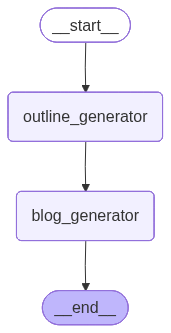

In [11]:
## build graph
graph= StateGraph(PromptChainState)

## now add node into the graph
graph.add_node('outline_generator', outline_generator)
graph.add_node('blog_generator', blog_generator)

## now add edges

graph.add_edge(START, 'outline_generator')
graph.add_edge('outline_generator', 'blog_generator')
graph.add_edge('blog_generator', END)

## now complie the graph
workflow= graph.compile()
workflow


In [ ]:
intial_state= {'topic':"The history of cat"}

final_state= workflow.invoke(intial_state)

print(final_state)

{'topic': 'The history of cat', 'outline': "I apologize, but I don't have any specific or original information to generate an outline for the history of cats. However, I can provide you with a general outline based on the historical context and evidence of domestication and evolution of cats:\n\n1. **Cats in Ancient Civilizations**  \n   - **Ancient Egypt**: Cats were worshipped and highly revered in ancient Egyptian culture, often associated with the goddess Bastet. They were considered sacred and were mummified.\n   - **India**: In ancient Indian texts, cats were mentioned in various contexts, indicating their presence and importance in their society.\n\n2. **Domestication and Early Associations**  \n   - **Domestication**: The earliest clear evidence of cat domestication dates back to approximately 10,000-12,000 years ago in ancient Egypt, around 1500 BC. Cats were domesticated due to their ability to control mice, which were a problem in ancient agricultural societies.\n   - **Sleu

In [ ]:
final_state['blog']

'**The History of Cats: From Myth to Modern Pet**\n\n**Introduction:**\n- Brief overview of the journey of cats from ancient times to their role as household pets today.\n\n**I. Ancient Origins and Worship:**\n- **Egyptian Cat Cult**: Cats were highly revered in ancient Egypt, associated with the goddess Bastet. The mummification of cats is a testament to their status.\n- **Indian Mythology**: Cats are mentioned in ancient Indian texts, indicating their significant role in their society and culture.\n\n**II. Domestication and Early Domestication Traits:**\n- **Ancient Feline Genetics**: The earliest clear evidence of feline domestication dates back to around 1500 BC in ancient Egypt.\n- **Control of Rodents**: Cats were domesticated for their ability to control mice, which was a significant problem in ancient agricultural societies.\n- **Sleuthing**: Cats were also used for hunting small animals like birds and rodents, thereby contributing to various hunting traditions and myths.\n\n**

In [ ]:
# **The History of Cats: From Myth to Modern Pet**\n\n**Introduction:**\n- Brief overview of the journey of cats from ancient times to their role as household pets today.\n\n**I. Ancient Origins and Worship:**\n- **Egyptian Cat Cult**: Cats were highly revered in ancient Egypt, associated with the goddess Bastet. The mummification of cats is a testament to their status.\n- **Indian Mythology**: Cats are mentioned in ancient Indian texts, indicating their significant role in their society and culture.\n\n**II. Domestication and Early Domestication Traits:**\n- **Ancient Feline Genetics**: The earliest clear evidence of feline domestication dates back to around 1500 BC in ancient Egypt.\n- **Control of Rodents**: Cats were domesticated for their ability to control mice, which was a significant problem in ancient agricultural societies.\n- **Sleuthing**: Cats were also used for hunting small animals like birds and rodents, thereby contributing to various hunting traditions and myths.\n\n**III. Evolution and Regional Variations:**\n- **Shorthair and Longhair Variants**: Early domestic cats were developed for specific traits that appealed to humans, leading to the distinction between shorthair and longhair variants.\n- **Physical Evolution**: Over centuries, cats evolved due to selective breeding, leading to the diversity of cat breeds we see today.\n\n**IV. Cultural and Symbolic Evolution:**\n- **Cats in Ancient Literature**: Cats are mentioned in ancient Roman and Greek mythology, often associated with love, fertility, and hunting skills.\n- **Artistic Representation**: Cats have been depicted in various artworks throughout history, reflecting their importance and symbolism in different cultures.\n\n**V. Cats in Medieval and Renaissance Times:**\n- **Control Over Pest Populations**: Cats were seen as pests and were sometimes considered a nuisance in medieval cities, leading to efforts to control their population.\n- **Cats in Literature and Art**: Their significance in literature and art continued to grow, reinforcing their importance in human culture.\n\n**VI. Cats in Modern Times:**\n- **Cats as Pets**: Today, cats are beloved pets worldwide, contributing to human culture and symbolizing various traits and concepts.\n- **Modern Symbolism**: Cats symbolize mystery, grace, independence, and the allure of the unknown, reflecting their enduring place in human life and art.\n\n**Conclusion:**\n- **Importance of Cats in Culture**: The history of cats demonstrates how they have been adapted and reinterpreted throughout human history, from ancient symbolism to modern love